In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READ THE DATASET TO PYTHON ENVIORNMENT

In [2]:
data=pd.read_excel(r'C:\Users\ANJALI\Downloads\iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [12]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [13]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### PRE-PROCESSING STEPS

### HANDLING OUTLIERS

Text(0.5, 1.0, 'Box Plot of SW')

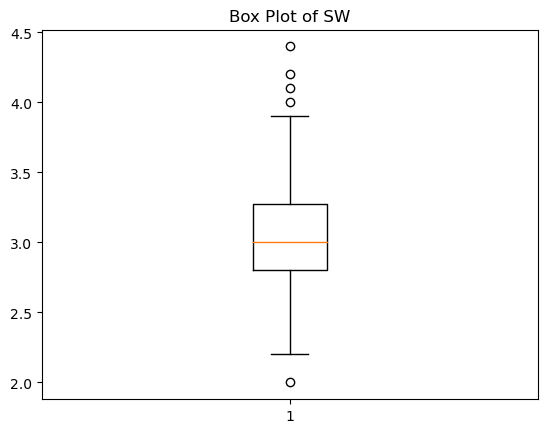

In [15]:
plt.boxplot(data['SW'])
plt.title('Box Plot of SW')

In [16]:
Q1= np.percentile(data['SW'],25)
Q2= np.percentile(data['SW'],50)
Q3= np.percentile(data['SW'],75)

In [17]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.275


In [18]:
data['SW'].median()

3.0

In [19]:
IQR=Q3-Q1

In [20]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.0874999999999995
3.9875


In [21]:
outlier=[]
for x in data['SW']:
  if((x>up_lim)or(x<low_lim)):
    outlier.append(x)

In [22]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [23]:
ind1=data['SW']>up_lim 
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
data.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'SW')

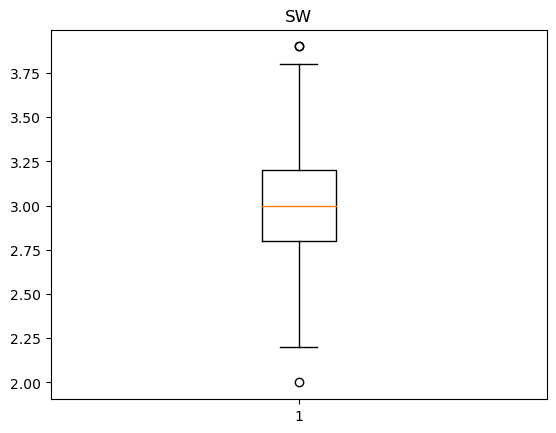

In [25]:
plt.boxplot(data['SW'])
plt.title('SW')

Text(0.5, 1.0, 'Box Plot of SL')

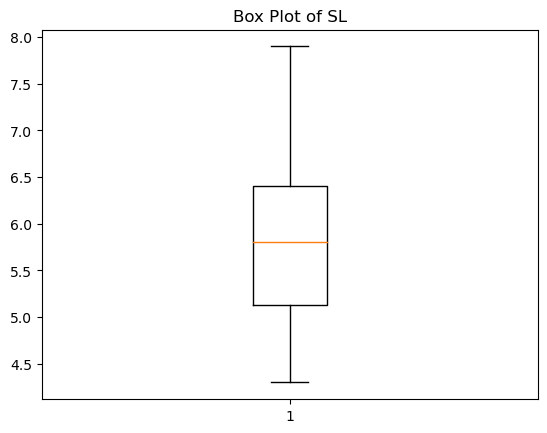

In [26]:
plt.boxplot(data['SL'])
plt.title('Box Plot of SL')

Text(0.5, 1.0, 'Box Plot of PW')

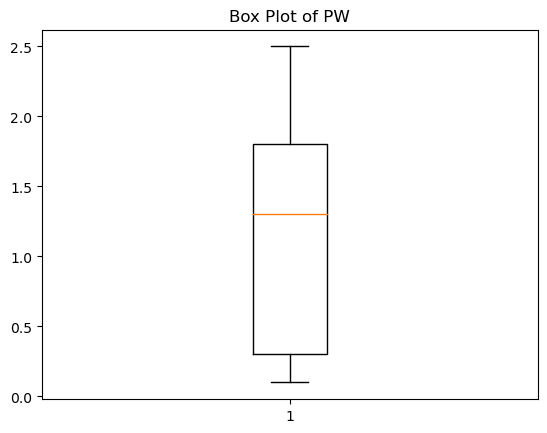

In [27]:
plt.boxplot(data['PW'])
plt.title('Box Plot of PW')

Text(0.5, 1.0, 'Box Plot of PL')

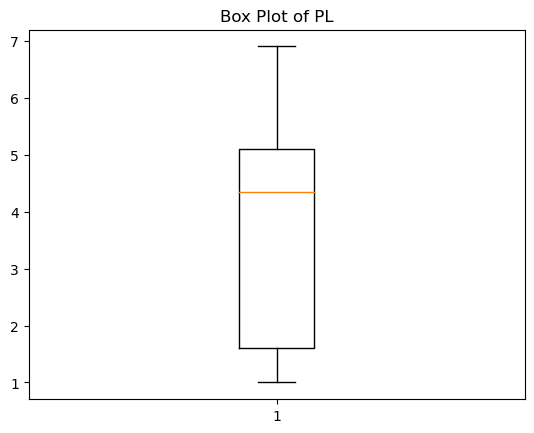

In [28]:
plt.boxplot(data['PL'])
plt.title('Box Plot of PL')

In [29]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
x_train.shape

(102, 4)

###  LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
model=lr.fit(x_train,y_train)

C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_predictions=model.predict(x_test)

In [34]:
lr.fit(x_train,y_train)

C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions=lr.predict(x_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [36]:
y_test

7          Iris-setosa
26         Iris-setosa
29         Iris-setosa
123     Iris-virginica
146     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
24         Iris-setosa
116     Iris-virginica
28         Iris-setosa
44         Iris-setosa
82     Iris-versicolor
134     Iris-virginica
66     Iris-versicolor
75     Iris-versicolor
95     Iris-versicolor
18         Iris-setosa
58     Iris-versicolor
102     Iris-virginica
8          Iris-setosa
93     Iris-versicolor
41         Iris-setosa
120     Iris-virginica
88     Iris-versicolor
148     Iris-virginica
37         Iris-setosa
147     Iris-virginica
94     Iris-versicolor
87     Iris-versicolor
109     Iris-virginica
80     Iris-versicolor
20         Iris-setosa
49         Iris-setosa
54     Iris-versicolor
48         Iris-setosa
2          Iris-setosa
67     Iris-versicolor
10         Iris-setosa
135     Iris-virginica
111     Iris-virginica
63     Iris-versicolor
114     Iris-virginica
65     Iris-versicolor
77     Iris

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
confusion_matrix(y_test,y_predictions)

array([[15,  1,  0],
       [ 0, 15,  1],
       [ 0,  2, 10]], dtype=int64)

In [39]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))


Accuracy =  0.9090909090909091


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scalar=StandardScaler()

In [42]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
predictions=lr.predict(x_test)
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
y_test

7          Iris-setosa
26         Iris-setosa
29         Iris-setosa
123     Iris-virginica
146     Iris-virginica
55     Iris-versicolor
47         Iris-setosa
24         Iris-setosa
116     Iris-virginica
28         Iris-setosa
44         Iris-setosa
82     Iris-versicolor
134     Iris-virginica
66     Iris-versicolor
75     Iris-versicolor
95     Iris-versicolor
18         Iris-setosa
58     Iris-versicolor
102     Iris-virginica
8          Iris-setosa
93     Iris-versicolor
41         Iris-setosa
120     Iris-virginica
88     Iris-versicolor
148     Iris-virginica
37         Iris-setosa
147     Iris-virginica
94     Iris-versicolor
87     Iris-versicolor
109     Iris-virginica
80     Iris-versicolor
20         Iris-setosa
49         Iris-setosa
54     Iris-versicolor
48         Iris-setosa
2          Iris-setosa
67     Iris-versicolor
10         Iris-setosa
135     Iris-virginica
111     Iris-virginica
63     Iris-versicolor
114     Iris-virginica
65     Iris-versicolor
77     Iris

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9545454545454546

### K NEAREST NEIGHBOURS

In [48]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors: 
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')   
  classifier.fit(x_train,y_train) 
  predictions=classifier.predict(x_test)
  acc=accuracy_score(y_test,predictions)
  acc_values.append(acc)


In [49]:
 
acc_values

[0.8863636363636364,
 0.9545454545454546,
 0.8863636363636364,
 0.9772727272727273,
 0.9090909090909091,
 0.9545454545454546,
 0.9318181818181818,
 0.9545454545454546,
 0.9545454545454546,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273]

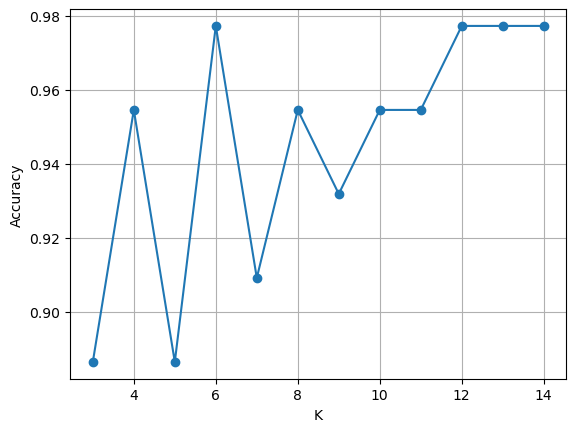

In [50]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()


In [51]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')   
classifier.fit(x_train,y_train) 
y_predictions=classifier.predict(x_test)
acc=accuracy_score(y_test,y_predictions)
acc_values.append(acc)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

In [52]:
print('Accuracy is',accuracy_score(y_test,predictions))


Accuracy is 0.9772727272727273


### DECISION TREE

In [53]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix


In [54]:
dt_clf=DecisionTreeClassifier()

In [55]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
print('Accuracy :',dt_clf.score(x_test,y_test)*100)

Accuracy : 88.63636363636364


In [57]:
confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

### SUPPORT VECTOR MACHINE

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [59]:
svmclf = SVC(kernel='linear')

In [60]:
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [61]:
y_pred=svmclf.predict(x_test)

In [62]:
print('Accuracy is;',accuracy_score(y_test,y_pred))

Accuracy is; 0.9090909090909091


In [63]:
confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

### RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [65]:
clf=RandomForestClassifier(n_estimators=100)

In [66]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
predictions=clf.predict(x_test)

In [68]:
print('Accuracy :',accuracy_score(y_test,predictions))

Accuracy : 0.9090909090909091


In [69]:
confusion_matrix(y_test,predictions)

array([[16,  0,  0],
       [ 0, 12,  4],
       [ 0,  0, 12]], dtype=int64)

In [ ]:
# ACCURACY RATES:
### LOGISTIC REGRESSION:95%
###KNN:97%
###DECISION TREE:88%
###SVM:90%
###RANDOM FOREST:90%
    

# ie, the classification algorithams Logistic Regression and KNN gives the best result